<a href="https://colab.research.google.com/github/swamyappu/Assignment-8/blob/main/Assignment_8_Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LeNet Model

In [2]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam, Adamax
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings

# Ignoring Warning Messages

warnings.filterwarnings("ignore")


In [3]:
# Load CIFAR-10 dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Define the list of class names
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

y_train = y_train.reshape(-1,) # Flatten the y_train array
y_test = y_test.reshape(-1,) # Flatten the y_test array
x_train = x_train / 255.0 # Normalize the x_train array by dividing it by 255.0
x_test = x_test / 255.0 # Normalize the x_test array by dividing it by 255.0


170498071/170498071 [==============================] - 13s 0us/step


In [4]:
# Define the model architecture
# added BatchNormaliztions and dropouts to reduce the over fitting
lenet = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', input_shape=(32,32,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Print the model summary
lenet.summary()

# Define the optimizer and compile the model
optimizer = Adamax(learning_rate=0.001)
lenet.compile(optimizer=optimizer, loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Define the learning rate scheduler
def lr_scheduler(epoch):
    if epoch < 50:
        return 0.001
    elif epoch < 80:
        return 0.0005
    else:
        return 0.0001

# Train the model
hist = lenet.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test), verbose=1, 
                 callbacks=[LearningRateScheduler(lr_scheduler)])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

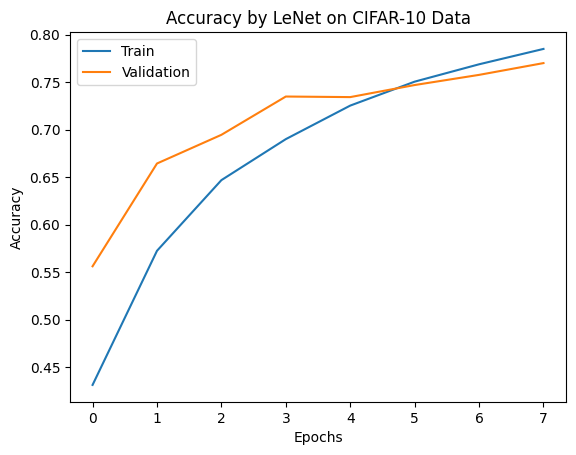

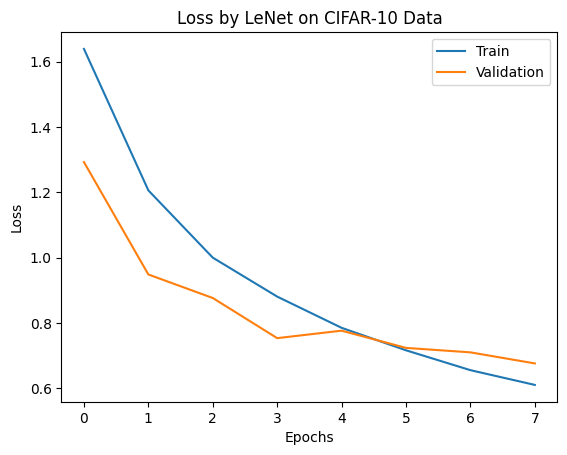

In [7]:
# summarize history for accuracy
plt.plot(hist.history['accuracy']) #Plotting the actual accuracy
plt.plot(hist.history['val_accuracy']) #Plotting the validation accuracy
plt.title("Accuracy by LeNet on CIFAR-10 Data") #adding Title to the Graph
plt.ylabel('Accuracy') #adding y axis as Accuracy
plt.xlabel('Epochs') #adding X axis as Epochs
plt.legend(['Train', 'Validation'], loc='upper left') #adding legend to the upper right corenr
plt.show() #displaying the graph

# summarize history for loss
plt.plot(hist.history['loss']) # plotting actual loss
plt.plot(hist.history['val_loss']) # plotting validation loss
plt.title('Loss by LeNet on CIFAR-10 Data') #adding title to the graph
plt.ylabel('Loss') #labeling y axis as Loss
plt.xlabel('Epochs') #labeling x axis as Epochs
plt.legend(['Train', 'Validation']) #adding legend to the plot
plt.show() # displaying the graph

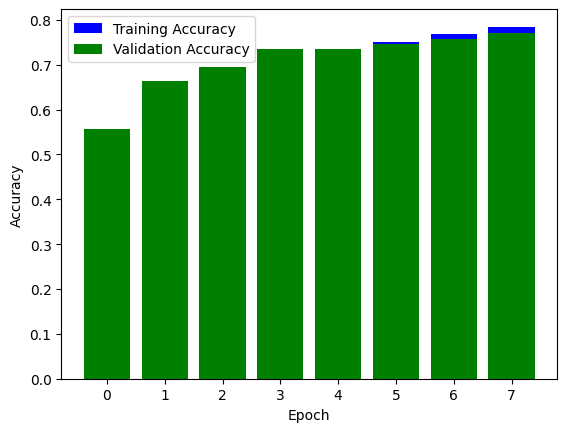

In [8]:
import matplotlib.pyplot as plt # Importing the pyplot module from the matplotlib library

train_accuracy = hist.history['accuracy'] # Extracting the training accuracy values from the history object
val_accuracy = hist.history['val_accuracy'] # Extracting the validation accuracy values from the history object
epochs = hist.epoch # Extracting the epoch values from the history object

#Creating a bar graph for training accuracy values with blue bars
plt.bar(epochs, train_accuracy, label='Training Accuracy', color='blue')

#Creating a bar graph for validation accuracy values with blue bars
plt.bar(epochs, val_accuracy, label='Validation Accuracy', color='green')

#Labeling the x-axis with the text 'Epoch'
plt.xlabel('Epoch')

#Labeling the y-axis with the text 'Accuracy'
plt.ylabel('Accuracy')

#Adding a legend to the plot
plt.legend()

#Displaying the plot
plt.show()


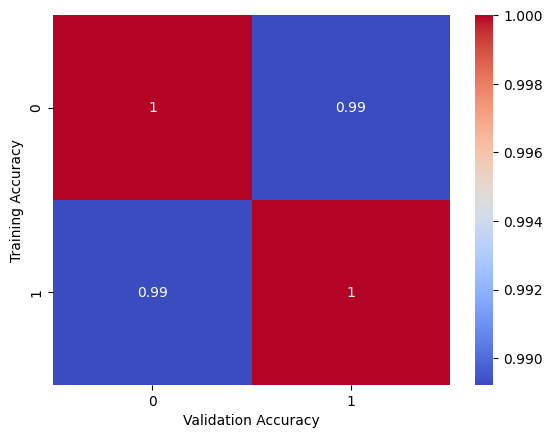

In [9]:
#importing the seaborn library
import seaborn as sns

#plotting the accuracy and History
corr = np.corrcoef(hist.history['accuracy'], hist.history['val_accuracy'])

#plotting the heat map of the given 
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xlabel('Validation Accuracy')
plt.ylabel('Training Accuracy')
plt.show()


In [10]:
import plotly.graph_objs as go
import plotly.express as px

# Create a Plotly figure for accuracy curves
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1, len(hist.history['accuracy'])+1),
                         y=hist.history['accuracy'],
                         mode='lines',
                         name='Training Accuracy'))
fig.add_trace(go.Scatter(x=np.arange(1, len(hist.history['val_accuracy'])+1),
                         y=hist.history['val_accuracy'],
                         mode='lines',
                         name='Validation Accuracy'))
fig.update_layout(title='Accuracy Curves',
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy')

# Create a Plotly figure for loss curves
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=np.arange(1, len(hist.history['loss'])+1),
                         y=hist.history['loss'],
                         mode='lines',
                         name='Training Loss'))
fig2.add_trace(go.Scatter(x=np.arange(1, len(hist.history['val_loss'])+1),
                         y=hist.history['val_loss'],
                         mode='lines',
                         name='Validation Loss'))
fig2.update_layout(title='Loss Curves',
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

# Display the Plotly figures
fig.show()
fig2.show()


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 1s 2ms/step


array([[785,  30,  18,  27,  11,   6,   8,   6,  48,  61],
       [  5, 890,   0,   3,   2,   1,   9,   4,  13,  73],
       [ 75,   1, 523,  56,  78, 106, 112,  24,   9,  16],
       [ 12,   9,  34, 516,  41, 255,  85,  17,  14,  17],
       [ 10,   3,  31,  45, 706,  58,  96,  41,   9,   1],
       [  9,   3,  12, 102,  27, 793,  16,  25,   5,   8],
       [  4,   3,   9,  27,  14,  31, 905,   1,   4,   2],
       [  9,   4,  11,  19,  36,  86,   8, 813,   3,  11],
       [ 36,  38,   5,  10,   4,   3,   5,   3, 868,  28],
       [  9,  47,   4,   5,   2,   4,   7,  10,  11, 901]])

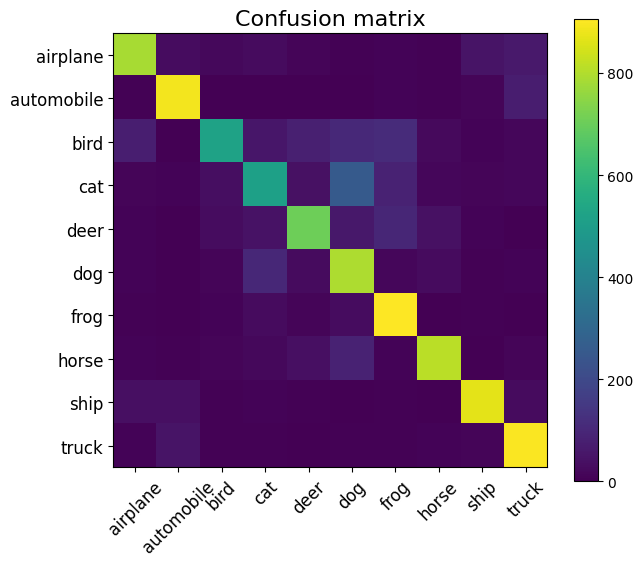

In [12]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [14]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.77


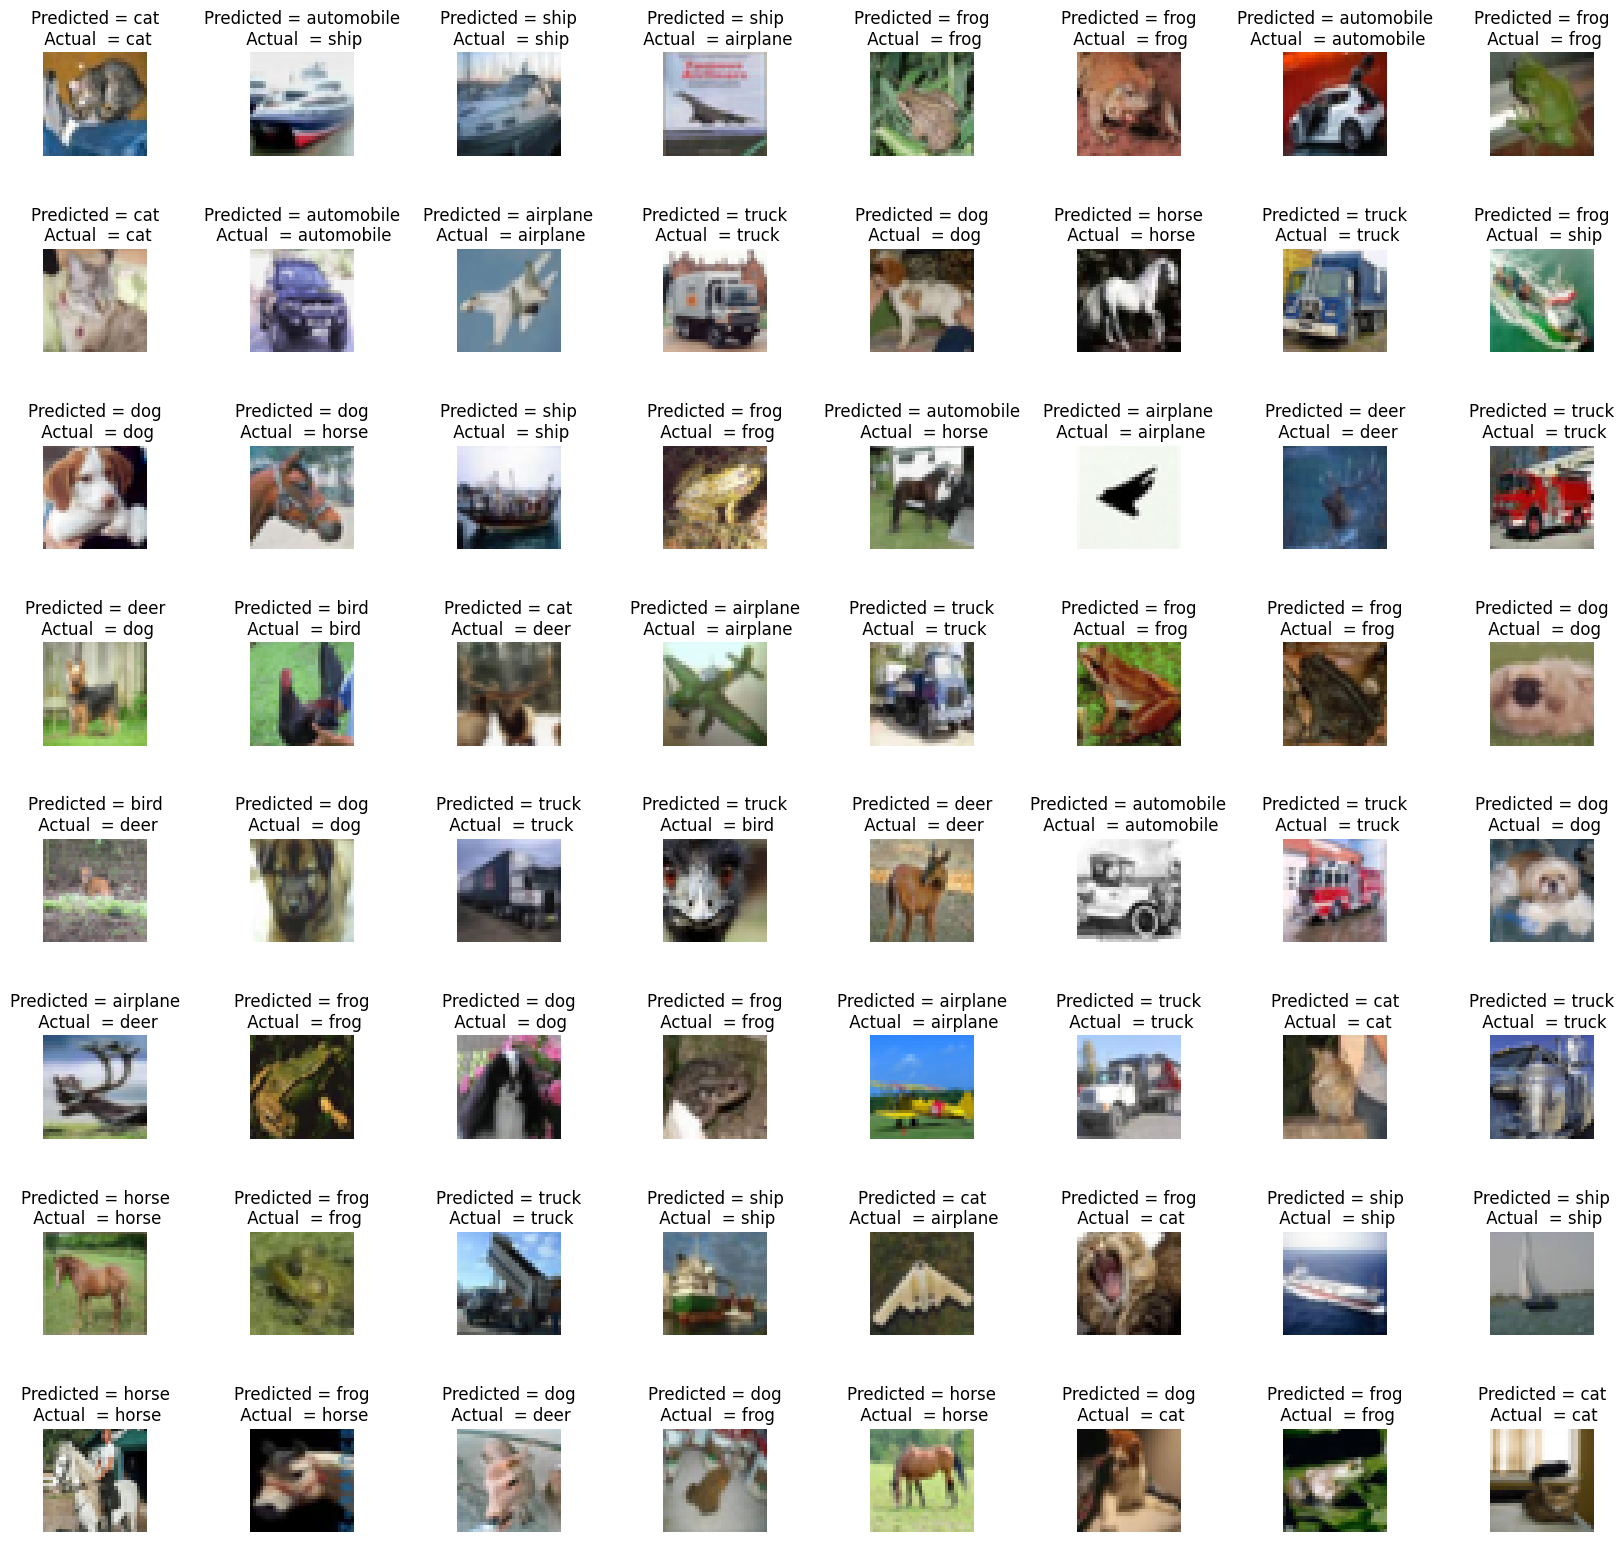

In [15]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)